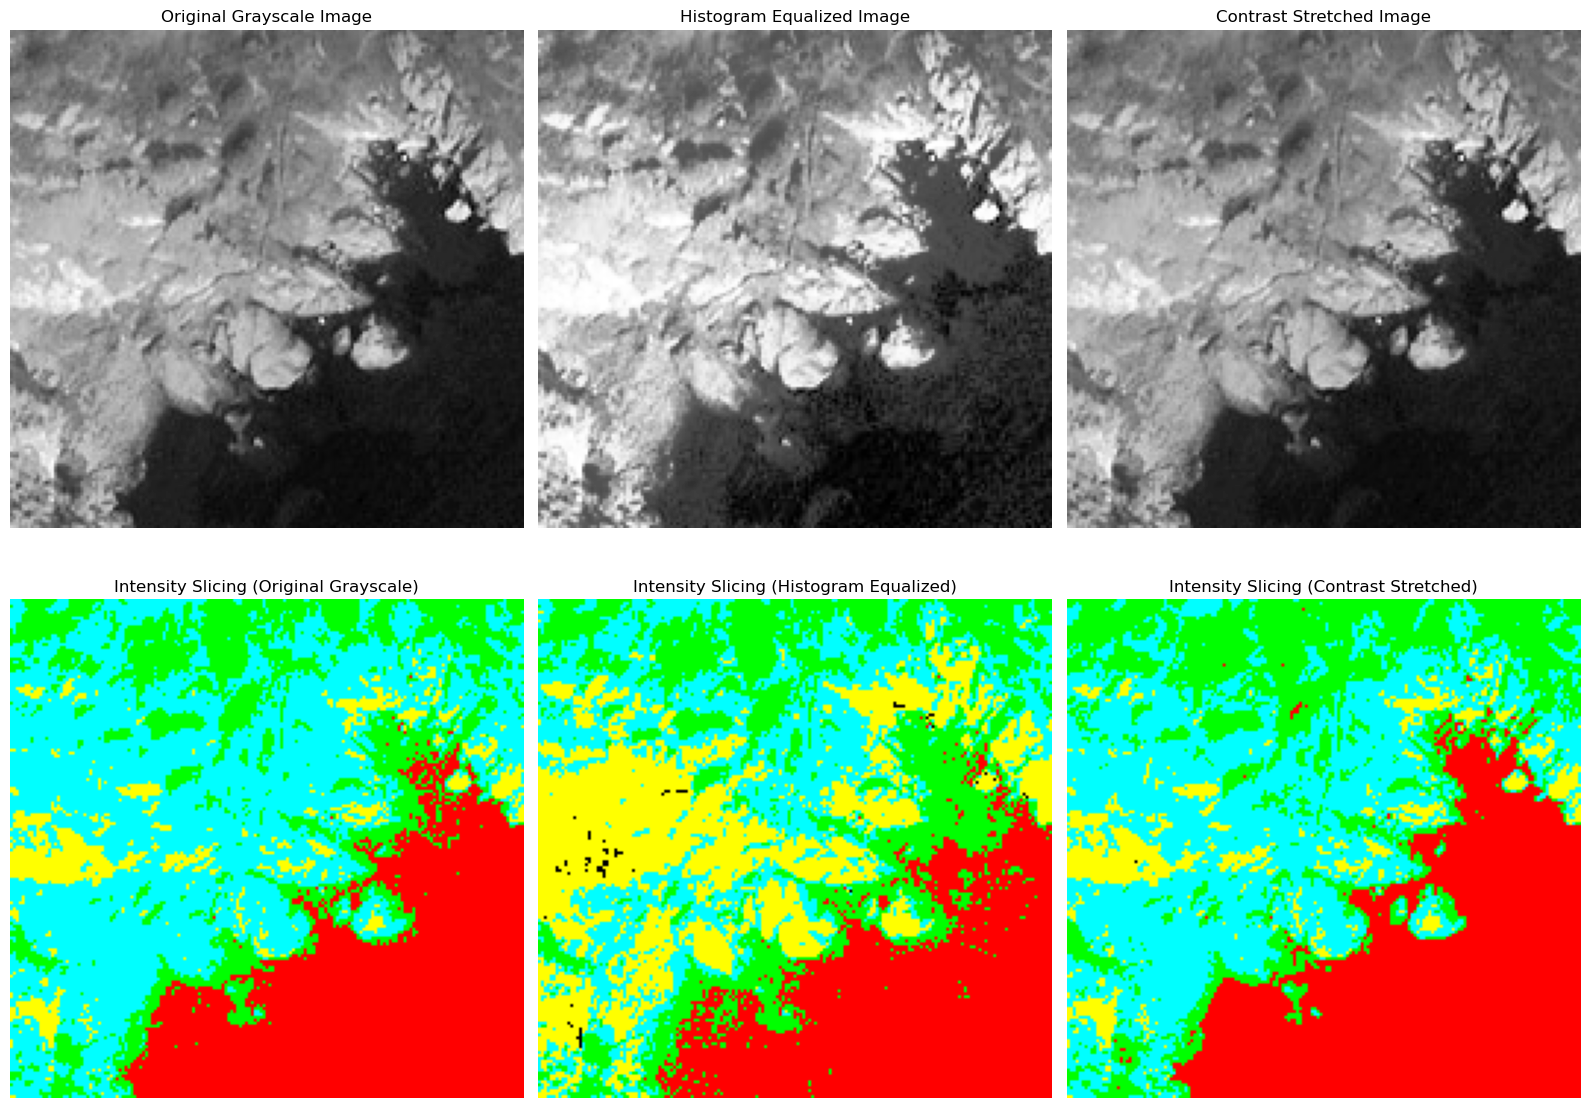

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Theory: Image Processing with Intensity Slicing and Preprocessing
# --------------------------------------------------------------
# **Intensity Slicing**:
# Intensity slicing is a technique in image processing where the grayscale intensity values of an image 
# are divided into intervals (slices). Each interval is mapped to a specific color, creating a pseudocolor 
# representation of the image. This helps highlight regions of interest based on intensity ranges.
#
# Applications:
# - Medical imaging (e.g., highlighting specific tissue densities in X-rays)
# - Remote sensing (e.g., identifying land features or water bodies)
# - Industrial inspection and quality control
#
# Steps in Intensity Slicing:
# 1. Define the number of intensity slices (e.g., 4 slices in this program).
# 2. Assign a specific color to each slice.
# 3. Use pixel-wise comparisons to determine the slice each pixel belongs to and assign the corresponding color.

# **Preprocessing Techniques**:
# Before applying intensity slicing, preprocessing methods like histogram equalization and contrast stretching 
# can be applied to enhance the image's visual quality. These techniques modify the intensity distribution 
# for better feature visibility.

# 1. Histogram Equalization:
#    - Redistributes the intensity values to make the histogram more uniform.
#    - Enhances contrast, especially in images with poor lighting or low dynamic range.
#    - Suitable for applications where uniform brightness distribution is desirable.

# 2. Contrast Stretching:
#    - Linearly maps the original intensity range (e.g., min to max) to a new range (e.g., 0–255).
#    - Expands the image's dynamic range, improving visibility and detail.
#    - Suitable for images with high dynamic range compression or low visibility.

# In this program:
# - Three variations of the original grayscale image are visualized:
#   1. Original grayscale image
#   2. Histogram-equalized grayscale image
#   3. Contrast-stretched grayscale image
# - Intensity slicing is applied to each variation, creating a pseudocolor version.
# - The visualizations compare the impact of preprocessing techniques on intensity slicing.

# Load a grayscale image
image_path = os.path.join(os.getcwd(), 'data', 'images', 'worldview-1.jpg')  # Replace with your image path
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if gray_image is None:
    print("Error: Image not found!")
else:
    # Enhance the grayscale image using histogram equalization
    # Histogram equalization redistributes the intensity levels to enhance contrast
    equalized_image = cv2.equalizeHist(gray_image)

    # Enhance the grayscale image using contrast stretching
    # Contrast stretching expands the intensity range of the image to improve visibility
    min_intensity, max_intensity = gray_image.min(), gray_image.max()
    contrast_stretched_image = cv2.normalize(gray_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

    # Define the number of slices for intensity slicing
    num_slices = 4
    max_intensity = 255  # Maximum intensity value for 8-bit images

    # Create the slicing boundaries (equally spaced intensity intervals)
    slice_boundaries = np.linspace(0, max_intensity, num_slices + 1, dtype=int)

    # Create the color map with different colors for each slice (BGR format)
    colormap = [
        (0, 0, 255),  # Red
        (0, 255, 0),  # Green
        (255, 255, 0),  # Yellow
        (0, 255, 255)   # Cyan
    ]

    # Create an empty 3-channel color image (same size as grayscale, with 3 color channels)
    color_image = np.zeros((gray_image.shape[0], gray_image.shape[1], 3), dtype=np.uint8)

    # Apply intensity slicing and color coding
    for i in range(num_slices):
        # Create a mask for pixels within the current intensity range
        mask = (gray_image >= slice_boundaries[i]) & (gray_image < slice_boundaries[i + 1])

        # Assign the corresponding color to the pixels in the mask
        for j in range(3):  # Apply to the 3 color channels (BGR)
            color_image[:, :, j] = np.where(mask, colormap[i][j], color_image[:, :, j])

    # Plot the original grayscale image, enhanced images, and the color-coded image
    plt.figure(figsize=(16, 12))

    # Original Grayscale Image
    plt.subplot(2, 3, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title("Original Grayscale Image")
    plt.axis("off")

    # Histogram Equalized Image
    plt.subplot(2, 3, 2)
    plt.imshow(equalized_image, cmap='gray')
    plt.title("Histogram Equalized Image")
    plt.axis("off")

    # Contrast Stretched Image
    plt.subplot(2, 3, 3)
    plt.imshow(contrast_stretched_image, cmap='gray')
    plt.title("Contrast Stretched Image")
    plt.axis("off")

    # Color-coded Image (Original Grayscale + Intensity Slicing)
    plt.subplot(2, 3, 4)
    plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
    plt.title("Intensity Slicing (Original Grayscale)")
    plt.axis("off")

    # Color-coded Image (Histogram Equalized + Intensity Slicing)
    equalized_color_image = np.zeros_like(color_image)
    for i in range(num_slices):
        mask = (equalized_image >= slice_boundaries[i]) & (equalized_image < slice_boundaries[i + 1])
        for j in range(3):
            equalized_color_image[:, :, j] = np.where(mask, colormap[i][j], equalized_color_image[:, :, j])
    plt.subplot(2, 3, 5)
    plt.imshow(cv2.cvtColor(equalized_color_image, cv2.COLOR_BGR2RGB))
    plt.title("Intensity Slicing (Histogram Equalized)")
    plt.axis("off")

    # Color-coded Image (Contrast Stretched + Intensity Slicing)
    contrast_color_image = np.zeros_like(color_image)
    for i in range(num_slices):
        mask = (contrast_stretched_image >= slice_boundaries[i]) & (contrast_stretched_image < slice_boundaries[i + 1])
        for j in range(3):
            contrast_color_image[:, :, j] = np.where(mask, colormap[i][j], contrast_color_image[:, :, j])
    plt.subplot(2, 3, 6)
    plt.imshow(cv2.cvtColor(contrast_color_image, cv2.COLOR_BGR2RGB))
    plt.title("Intensity Slicing (Contrast Stretched)")
    plt.axis("off")

    # Adjust layout and display all images
    plt.tight_layout()
    plt.show()
